<a href="https://colab.research.google.com/github/JOAQUINESTEVEZ/ELS2002-Graduation-Time-Prediction/blob/main/Cleaned_Dataset_Version3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cleaned Dataset Version 3**

---


## Author: Joaquin Estevez
## Dataset: has 4012 columns and 16197 rows

### Import Packages

In [ ]:
import pandas as pd
import io
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from google.colab import files, drive

### Load File

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SURP2024/datasets/raw/els_02_12_byf3pststu_v1_0.csv')

<ipython-input-3-3ee61efce66c>:1: DtypeWarning: Columns (1222) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/SURP2024/datasets/raw/els_02_12_byf3pststu_v1_0.csv')


## **EDA**

### Shape

In [ ]:
df.shape

(16197, 4012)

### Null Values

In [ ]:
df.isnull().sum()

STU_ID          0
SCH_ID      16197
STRAT_ID        0
PSU             0
F1SCH_ID     3819
            ...  
BYF10I        645
BYF10J        695
BYF10K        499
BYF10L        432
BYF10M        526
Length: 2711, dtype: int64

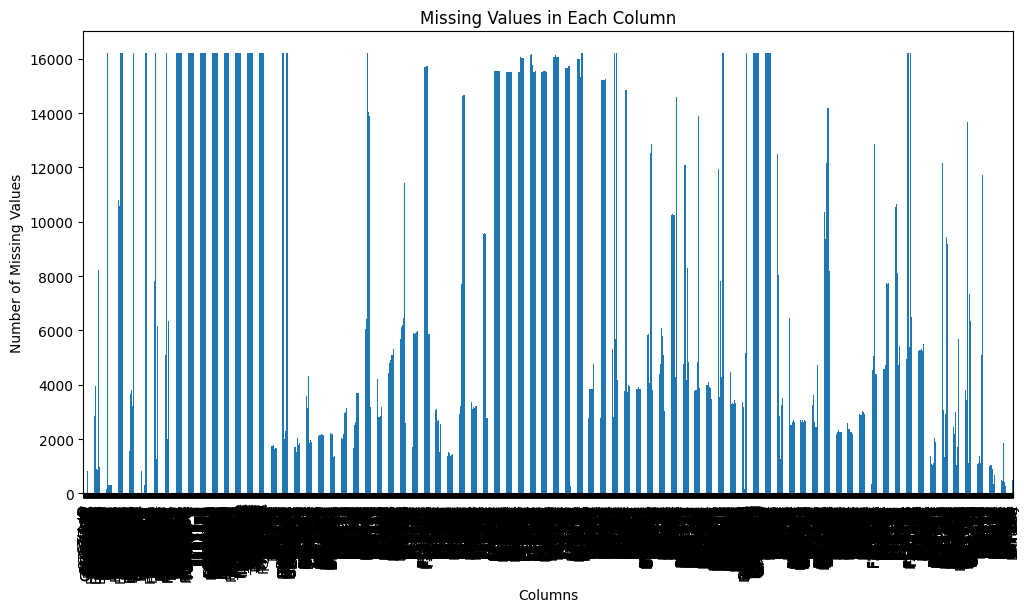

In [ ]:
# Calculate the number of missing values in each column
missing_values = df.isnull().sum()

# Plot the missing values
plt.figure(figsize=(12, 6))
missing_values.plot(kind='bar')
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.show()

### Duplicates

In [ ]:
df.nunique()

STU_ID      16197
SCH_ID          0
STRAT_ID      361
PSU             3
F1SCH_ID      751
            ...  
BYF10I          2
BYF10J          2
BYF10K          2
BYF10L          2
BYF10M          2
Length: 2711, dtype: int64

### Density

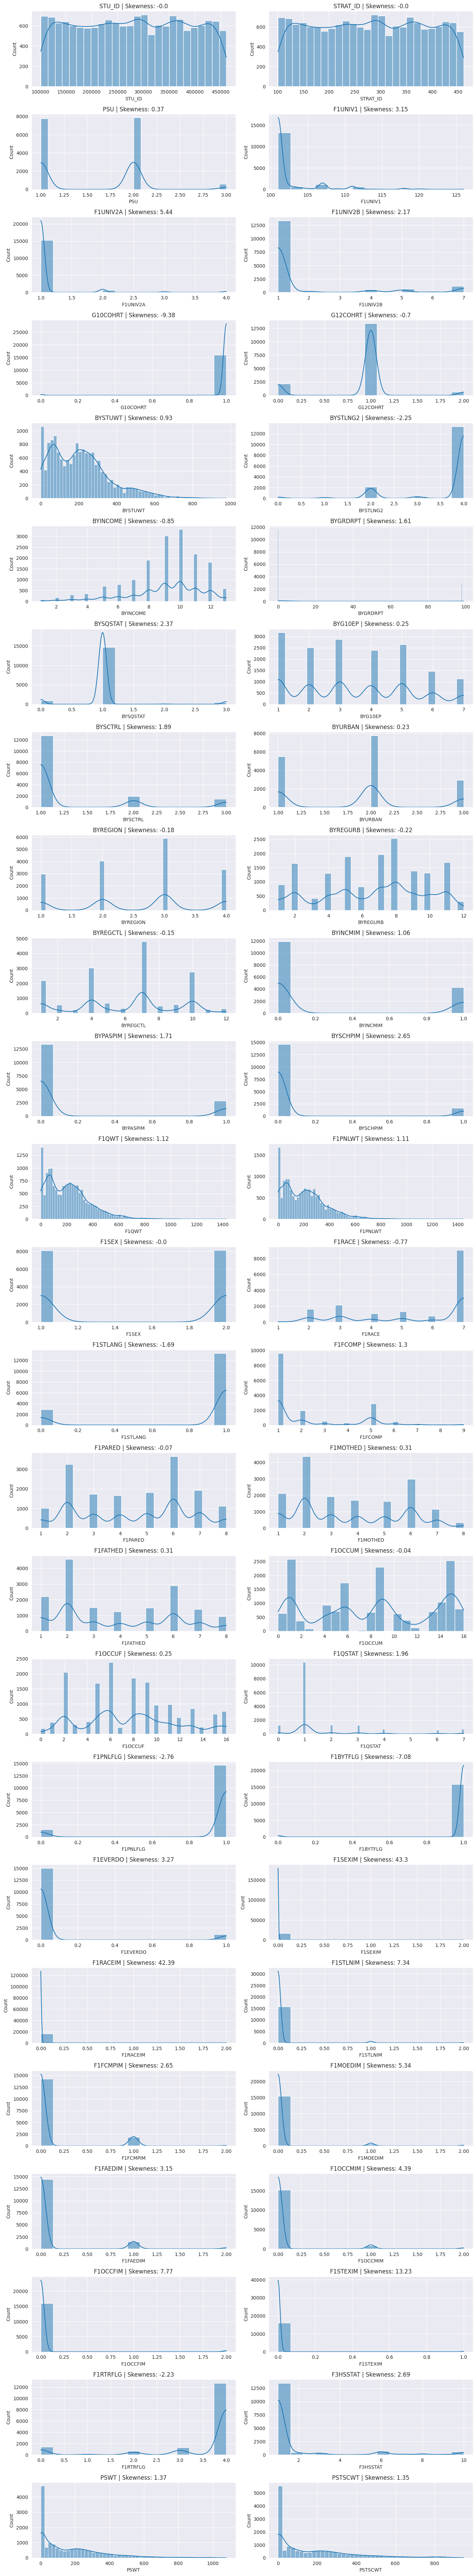

In [ ]:
# Set Seaborn style

sns.set_style("darkgrid")


# Identify numerical columns

numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns


# Plot distribution of each numerical feature

plt.figure(figsize=(14, len(numerical_columns) * 3))

for idx, feature in enumerate(numerical_columns, 1):

    plt.subplot(len(numerical_columns), 2, idx)

    sns.histplot(df[feature], kde=True)

    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")


# Adjust layout and show plots
plt.tight_layout()
plt.show()

### Columns with single value

In [ ]:
# Identify columns where all rows have the same value
single_value_columns = df.columns[df.nunique(dropna=False) == 1]

# Display the columns with all identical values
print("Columns with all identical values:")
print(single_value_columns)

Columns with all identical values:
Index(['SCH_ID', 'BYEXPWT', 'BYRACE_R', 'BYRACE2', 'BYSARACE', 'BYRACE_1',
       'BYRACE_2', 'BYRACE_3', 'BYRACE_4', 'BYRACE_5',
       ...
       'BYA21', 'BYA22A', 'F1A01', 'F1A22A', 'F1A26', 'F1A29AR', 'F1A29BR',
       'F1A29CR', 'F1A29DR', 'F1A29ER'],
      dtype='object', length=500)


## **Data Preprocessing Steps:**

In [ ]:
# Check num of cols and rows.
df.info()
'BYA53' in df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16197 entries, 0 to 16196
Columns: 4012 entries, STU_ID to BYF10M
dtypes: float64(95), int64(3909), object(8)
memory usage: 495.8+ MB


True

### Display remaining variables

In [ ]:
for col in df.columns:
  print(col)

BYSEX
BYRACE
BYSTLANG
BYHOMLNG
BYDOB_P
BYPARACE
BYPARLNG
BYPLANG
BYFCOMP
BYSIBSTR
BYSIBHOM
BYGNSTAT
BYPARED
BYMOTHED
BYFATHED
BYOCCUM
BYOCCUF
BYINCOME
BYGRDRPT
BYNONUSG
BYRISKFC
BYPARASP
BYSCHPRG
BYQXDATP
BYTXSTAT
BYPQSTAT
BYTXPAFG
BYTXCSTD
BYNELS2M
BYNELS2R
BYNELS0M
BYPISAME
BYPISARE
BYTXMIRR
BYTXMSTD
BYTX1MPP
BYTX2MPP
BYTX3MPP
BYTX4MPP
BYTX5MPP
BYTXRIRR
BYTXRSTD
BYTX1RPP
BYTX2RPP
BYTX3RPP
BYXTRACU
BYG10EP
BYSCTRL
BYURBAN
BYREGION
BYREGURB
BYSPANP
BY10FLP
F1SEX
F1RACE
F1STLANG
F1HOMLNG
F1DOB_P
F1FCOMP
F1PARED
F1MOTHED
F1FATHED
F1OCCUM
F1OCCUF
F1STEXP
F1QMODE
F1EVERDO
F1CTLPTN
F1QXDATP
F1HIMATH
F1PSEPLN
F1XTRACU
F1WRKHRS
F1COMPHR
F1RHTUNP
F1RMAT_P
F1RTRCC
F1RGPP2
F3HSSTAT
BYS14
BYS15
BYS34B
BYS37
BYS41A
BYS41B
BYS41C
BYS41D
BYS41E
BYS41F
BYS41G
BYS41H
BYS41I
BYS67
F1S15
F1S16A
F1S16B
F1S16C
F1S16D
F1S16E
F1S16F
F1S16G
F1S16H
F1S16I
F1S17A
F1S17B
F1S17C
F1S17D
F1S17E
F1S17F
F1S17G
F1S17H
F1S17I
F1S17J
F1S30E
F1S30F
F1S30G
F1S30H
F1S30I
F1S33
F1S34A
F1S34B
F1S35A
F1S35B
F1S36B
F1S37A
F1S

### 1- Remove N/A values

In [ ]:
df = df.dropna()

### 2- Remove vars from F2, F3, and F1 transfers


In [ ]:
pattern = r'^(F2|F1T|F3)(?!HSSTAT)'

# Identify columns to drop
columns_to_drop = df.filter(regex=pattern).columns

# Drop the identified columns
df = df.drop(columns=columns_to_drop)
df = df.drop(columns='F2HSSTAT')

### 3- Remove complementary dropout vars

In [ ]:
# Remove columns related to dropout programs (F1A24)
columns_to_remove = ["F1A24" + letter for letter in list("ABCDEFG")]
df = df.drop(columns=columns_to_remove)

### 4- Remove complementary dropout vars

In [ ]:
# Step 4: Remove columns related to dropout programs (F1A24)
columns_to_remove = ["F1A25" + letter for letter in list("ABCDEFGHI")]
df = df.drop(columns=columns_to_remove)

### 5- Remove transfer vars

In [ ]:
df = df.drop(columns=["F1DOSTAT"])

### 6- Remove negative values by N/A

In [ ]:
df = df.applymap(lambda x: pd.NA if x < 0 else x)

### 7- Remove columns where all rows have the same value

In [ ]:
df = df.loc[:, df.nunique(dropna=True) > 1]

### 8- Remove unnecessary columns. Ex: Id vars

In [ ]:
columns_to_remove = ["STU_ID", "STRAT_ID", "PSU", "F1UNIV1", "F1UNIV2A", "F1UNIV2B", "G10COHRT", "G12COHRT", "BYSQSTAT", "BYREGCTL", "BYSTLNG2", "F1QSTAT"]
df = df.drop(columns=columns_to_remove)

### 9- Remove columns ending with "WT", "IM", "QU", "QR", "FG", or "FLG"

In [ ]:
df = df.filter(regex='^(?!.*(?:WT|IM|FLG|QU|QR|FG)$)')

### 10- Filter rows where "bygrdrpt" is in ("0", "1", "2")

In [ ]:
df = df[df['BYGRDRPT'].isin([0, 1, 2])]

### 11- Remove vars with 10% or more of missing values

In [ ]:
def clean_columns(df):
    # Calculate the percentage of missing values for each column
    missing_percentages = (df.isnull().sum() / len(df)) * 100

    # Find columns with 10% or more missing values
    columns_with_high_missing_values = missing_percentages[missing_percentages >= 10]

    # Print columns with their respective percentages of missing values
    if not columns_with_high_missing_values.empty:
        print("Columns with 10% or more missing values:")
        for column, percentage in columns_with_high_missing_values.items():
            print(f"{column}: {percentage:.2f}%")
    else:
        print("No columns have 10% or more missing values.")

    # Remove columns with 10% or more missing values
    cleaned_df = df.drop(columns=columns_with_high_missing_values.index)

    # Print information about removed columns
    num_removed_columns = len(columns_with_high_missing_values)
    print(f"{num_removed_columns} columns removed due to 10% or more missing values.")

    # Now you can use 'cleaned_df' for further analysis or processing
    return cleaned_df

In [ ]:
df = clean_columns(df)

No columns have 10% or more missing values.
0 columns removed due to 10% or more missing values.


### Correlation

In [ ]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

             BYSEX    BYRACE  BYSTLANG  BYHOMLNG   BYDOB_P  BYPARACE  \
BYSEX     1.000000  0.011619 -0.040962  0.045238  0.082311  0.003902   
BYRACE    0.011619  1.000000  0.433913 -0.411579 -0.002989  0.842431   
BYSTLANG -0.040962  0.433913  1.000000 -0.841634 -0.020308  0.388388   
BYHOMLNG  0.045238 -0.411579 -0.841634  1.000000  0.034951 -0.386311   
BYDOB_P   0.082311 -0.002989 -0.020308  0.034951  1.000000 -0.006109   
...            ...       ...       ...       ...       ...       ...   
BYF10I   -0.018102  0.015044 -0.012473  0.018187  0.017392  0.012889   
BYF10J   -0.031899  0.101834  0.124879 -0.128122 -0.071985  0.102046   
BYF10K    0.038835  0.085232  0.089669 -0.051421 -0.021184  0.088007   
BYF10L   -0.026659 -0.032848  0.026829 -0.044883  0.027690 -0.015192   
BYF10M    0.014061  0.029694  0.029506 -0.028538 -0.011740  0.041379   

          BYPARLNG   BYPLANG   BYFCOMP  BYSIBSTR  ...    BYF10D    BYF10E  \
BYSEX     0.060583 -0.041620  0.030892 -0.028124  ... -0.0

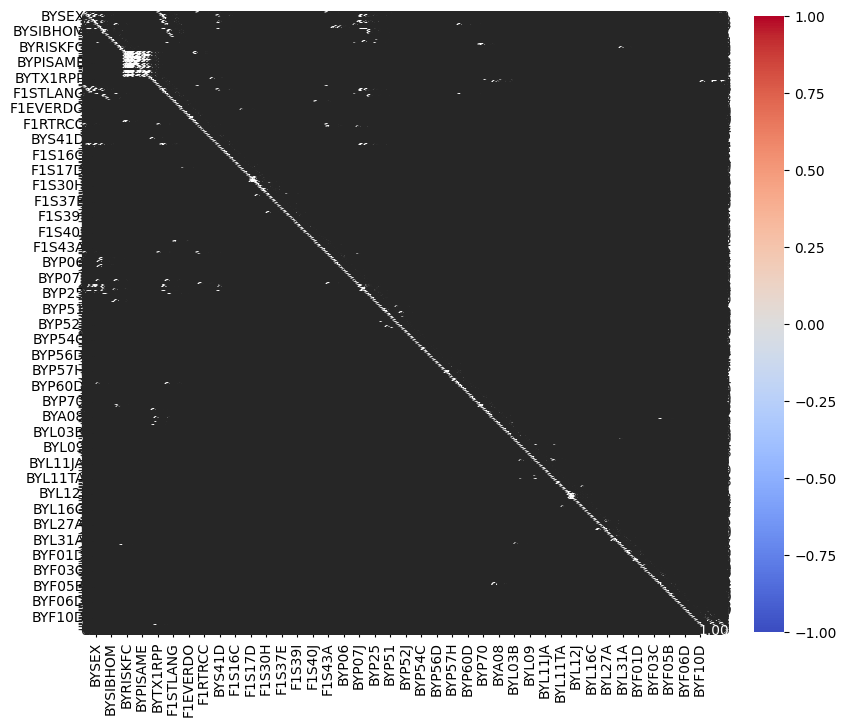

In [ ]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [ ]:
# Set the threshold for high correlation
threshold = 0.75

# Find pairs of highly correlated variables
high_corr_pairs = [(i, j) for i in correlation_matrix.columns for j in correlation_matrix.columns
                   if i != j and abs(correlation_matrix.loc[i, j]) > threshold]

print("Highly correlated pairs:", high_corr_pairs)
print(len(high_corr_pairs))

Highly correlated pairs: [('BYSEX', 'F1SEX'), ('BYSEX', 'BYS14'), ('BYSEX', 'F1N02'), ('BYRACE', 'BYPARACE'), ('BYRACE', 'F1RACE'), ('BYSTLANG', 'BYHOMLNG'), ('BYSTLANG', 'F1STLANG'), ('BYSTLANG', 'F1HOMLNG'), ('BYSTLANG', 'BYS67'), ('BYHOMLNG', 'BYSTLANG'), ('BYHOMLNG', 'F1STLANG'), ('BYHOMLNG', 'F1HOMLNG'), ('BYHOMLNG', 'BYS67'), ('BYDOB_P', 'F1DOB_P'), ('BYPARACE', 'BYRACE'), ('BYPARACE', 'F1RACE'), ('BYPARLNG', 'BYP28'), ('BYPLANG', 'BYP28'), ('BYFCOMP', 'F1FCOMP'), ('BYFCOMP', 'BYP10'), ('BYSIBHOM', 'BYP06'), ('BYGNSTAT', 'BYP17'), ('BYGNSTAT', 'BYP23'), ('BYPARED', 'BYMOTHED'), ('BYPARED', 'BYFATHED'), ('BYPARED', 'F1MOTHED'), ('BYPARED', 'F1FATHED'), ('BYPARED', 'BYP34A'), ('BYMOTHED', 'BYPARED'), ('BYMOTHED', 'F1MOTHED'), ('BYMOTHED', 'BYP34A'), ('BYFATHED', 'BYPARED'), ('BYFATHED', 'F1FATHED'), ('BYOCCUM', 'F1OCCUM'), ('BYOCCUF', 'F1OCCUF'), ('BYGRDRPT', 'BYP46'), ('BYPARASP', 'BYP79'), ('BYTXCSTD', 'BYNELS2M'), ('BYTXCSTD', 'BYNELS2R'), ('BYTXCSTD', 'BYNELS0M'), ('BYTXCSTD', 

### 12- Remove rows where income category "BYINCOME" is None

In [ ]:
df = df[~df['BYINCOME'].isin([1])]

### 13- Remove vars "BYURBAN" and "BYREGION" because they are mix together in "BYREGURB"

In [ ]:
df.drop(columns=['BYURBAN'], inplace=True)
df.drop(columns=['BYREGION'], inplace=True)

### 14- Remove parent's highest education "F1PARED" because we have a variable for mother's highest education "F1MOTHED" and one for father's highest education "F1FATHED"

In [ ]:
df.drop(columns=['F1PARED'], inplace=True)

### 16- Remove Math IRT estimated number right (BYTXMIRR)

In [ ]:
df.drop(columns=['BYTXMIRR'], inplace=True)

### 19- Remove Grade span-administrator questionnaire (BYSPANP)

In [ ]:
df.drop(columns=['BYSPANP'], inplace=True)

### 22- Remove F1N07, same as variable F1STLANG

In [ ]:
df.drop(columns=['F1N07'], inplace=True)

### 23- Remove Base year administrator questionnaire status (BYADMSTA)

In [ ]:
df.drop(columns=['BYADMSTA'], inplace=True)

### 25- Remove Date completed interview (BYA53)

In [ ]:
df.drop(columns=['BYA53'], inplace=True)

<ipython-input-80-33e97fff9a1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['BYA53'], inplace=True)


### 26- Remove vars that are repeated in other vars. Ex: (BYF04A) because repeated in BYF01D

In [ ]:
df.drop(columns=['BYF04A'], inplace=True)
df.drop(columns=['BYF04B'], inplace=True)
df.drop(columns=['BYF04C'], inplace=True)
df.drop(columns=['BYF04D'], inplace=True)
df.drop(columns=['BYF05B'], inplace=True)
df.drop(columns=['BYF05C'], inplace=True)
df.drop(columns=['BYF05D'], inplace=True)
df.drop(columns=['BYF05E'], inplace=True)
df.drop(columns=['BYF05F'], inplace=True)
df.drop(columns=['BYF05G'], inplace=True)

## **Resulting Dataset:**


*   Number of rows: 13119
*   Number of columns: 85

In [ ]:
# Number of rows and columns in the DataFrame
num_rows, num_columns = df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 13119
Number of columns: 85


In [ ]:
df.columns

Index(['BYINCOME', 'BYGRDRPT', 'BYPARASP', 'BYSCHPRG', 'BYPQSTAT', 'BYTXCSTD',
       'BYNELS2M', 'BYNELS2R', 'BYNELS0M', 'BYPISAME', 'BYPISARE', 'BYTXMSTD',
       'BYTX1MPP', 'BYTX2MPP', 'BYTX3MPP', 'BYTX4MPP', 'BYTX5MPP', 'BYTXRIRR',
       'BYTXRSTD', 'BYTX1RPP', 'BYTX2RPP', 'BYTX3RPP', 'BYG10EP', 'BYSCTRL',
       'BYREGURB', 'F1SEX', 'F1RACE', 'F1STLANG', 'F1HOMLNG', 'F1DOB_P',
       'F1FCOMP', 'F1MOTHED', 'F1FATHED', 'F1OCCUM', 'F1OCCUF', 'F1EVERDO',
       'F1CTLPTN', 'F1N02', 'F1N03', 'BYA07', 'BYA08', 'BYA09', 'BYA11',
       'BYF01A', 'BYF01B', 'BYF01C', 'BYF01D', 'BYF01E', 'BYF01F', 'BYF01G',
       'BYF01H', 'BYF01I', 'BYF01J', 'BYF03A', 'BYF03B', 'BYF03C', 'BYF03D',
       'BYF04E', 'BYF04F', 'BYF04G', 'BYF05A', 'BYF05H', 'BYF06A', 'BYF06B',
       'BYF06C', 'BYF06D', 'BYF07', 'BYF09A', 'BYF09B', 'BYF09C', 'BYF09D',
       'BYF09E', 'BYF10A', 'BYF10B', 'BYF10C', 'BYF10D', 'BYF10E', 'BYF10F',
       'BYF10G', 'BYF10H', 'BYF10I', 'BYF10J', 'BYF10K', 'BYF10L', 'BYF10M'],
  

### Save Dataset in CSV file

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
try:
  df.to_csv('/content/drive/My Drive/ELS2002: Joaquin Estevez/Datasets/cleaned/cleaned_els_02_12_byf3pststu_v2_0.csv', index=False)
  print("DataFrame saved to cleaned_els_02_12_byf3pststu_v2_0.csv")
except Exception as e:
  print("An error occurred:", e)

DataFrame saved to cleaned_els_02_12_byf3pststu_v2_0.csv
